# Regularization



1. Ridge (L2) - Penalty applied on square of coefficeints.
2. Lasso (L1) - Penlty applied on absolute values of coefficients

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

## Step 1 - Data ingestion

In [2]:
import pandas as pd

df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  94 non-null     int64  
 1   Manufacturer        94 non-null     object 
 2   Model               94 non-null     object 
 3   Type                94 non-null     object 
 4   Min.Price           94 non-null     float64
 5   Price               94 non-null     float64
 6   Max.Price           94 non-null     float64
 7   MPG.city            94 non-null     int64  
 8   MPG.highway         94 non-null     int64  
 9   AirBags             90 non-null     object 
 10  DriveTrain          94 non-null     object 
 11  Cylinders           94 non-null     object 
 12  EngineSize          94 non-null     float64
 13  Horsepower          94 non-null     int64  
 14  RPM                 94 non-null     int64  
 15  Rev.per.mile        94 non-null     int64  
 16  Man.trans.

In [4]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [5]:
m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(93, 28)

## Step 3 - Seperate X and Y(Weight)



id is called Statistically insgnificant

In [8]:
X = df.drop(columns=["Weight", "id"])
Y = df[["Weight"]]

In [9]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Step 4 - Preprocessing

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avail"),
    OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False),
)

In [17]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 5 - Train Test split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=10
)

In [20]:
xtrain.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
42,-0.382326,-0.209181,-0.063707,0.292406,0.360925,-0.453339,-0.073484,0.538074,0.562533,0.102856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,-0.715702,-0.823294,-0.874937,1.008032,1.303790,-0.841022,-0.783765,0.369586,-0.227212,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.318914,0.134306,-0.018132,-0.602126,-0.204794,1.097393,0.502419,-0.809828,-1.543455,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.267368,-0.406946,-0.501224,-0.244313,-0.393368,-0.162577,-0.841356,-0.809828,0.268910,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
ytrain.head()

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080


In [22]:
xtest.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
34,-0.497283,-0.573485,-0.610603,0.292406,0.172352,-0.647181,-0.553404,0.369586,0.015786,-0.357028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,-0.301856,0.040627,0.310006,-1.317751,-1.713379,0.322027,0.022499,-0.809828,-0.510711,1.329213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.146478,-0.115503,-0.318925,-0.423219,-0.204794,0.612789,0.176074,0.032611,-0.692960,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ytest.head()

,Weight
34,2710
90,2810
3,3405
35,3735
19,3515


In [24]:
xtrain.shape

(74, 249)

In [25]:
xtest.shape

(19, 249)

## Step 6 - Model Building



Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

model0 = LinearRegression()
model0.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
model0.score(xtrain, ytrain)

1.0

In [28]:
model0.score(xtest, ytest)

0.835567313862678

### Ridge

In [29]:
from sklearn.linear_model import Ridge

model1 = Ridge(alpha=0.5)
model1.fit(xtrain, ytrain)

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [30]:
model1.intercept_

array([3085.0182596])

In [31]:
model1.coef_

array([ 11.58586891,  -0.74136926, -10.06925569, -32.73022487,
       -75.13979224,  -2.55529792, 131.79212861, -15.52175091,
       -14.89053826,  86.31728789,  29.8061587 ,  45.40602749,
       157.00116429,  36.53940699,  29.23366721, -15.80029344,
        37.95308711,  32.30201346,  63.19181369, -47.34979092,
       -11.21880771, -49.63010596,   0.        ,  50.37690271,
        34.22243684, -42.02021895,  12.96403315,   2.90674661,
        -0.368316  , -10.48378619, -20.9322532 , -24.14322149,
        22.17257435, -14.26870969, -26.50009488,   9.88126058,
        -6.73933847,  64.17580895, -39.16027184,   0.        ,
       -11.90388808, -60.45117478,  -3.07433041,   9.67856665,
        19.05139936,   6.52074136,  61.44169256, -22.09029375,
        -0.67127759,  -1.12916834, -25.8288173 ,   2.46500831,
        63.19181369,  -1.26679175, -20.96112542,  32.30201346,
       -60.45117478,  -1.54237446,  31.82760386,   0.        ,
       -12.78792269, -21.13833078,   2.04962089,   8.14

In [32]:
model1.score(xtrain, ytrain)

0.9993738119797262

In [33]:
model1.score(xtest, ytest)

0.844703310174985

### Hyperparameter tuning for Ridge

In [34]:
import numpy as np

alphas = {"alpha": np.arange(start=0.1, stop=60, step=0.1)}
print(alphas)

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9

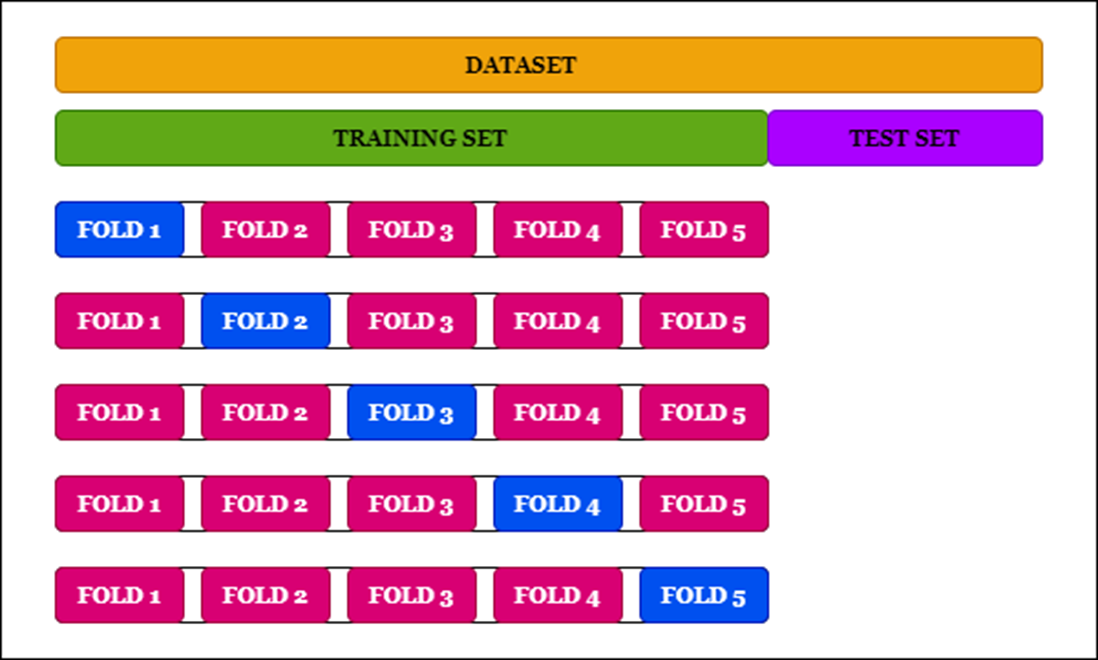

In [35]:
from sklearn.model_selection import GridSearchCV

base_ridge = Ridge()
gscv_ridge = GridSearchCV(estimator=base_ridge, param_grid=alphas, scoring="r2", cv=5)
gscv_ridge.fit(xtrain, ytrain)

,estimator,Ridge()
,param_grid,"{'alpha': array([ 0.1, ..., 59.8, 59.9])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(2.3000000000000003)


In [36]:
gscv_ridge.best_params_

{'alpha': np.float64(2.3000000000000003)}

In [37]:
gscv_ridge.best_score_

np.float64(0.9445036196574303)

In [38]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

,alpha,np.float64(2.3000000000000003)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [39]:
best_ridge.score(xtrain, ytrain)

0.9943672524917501

In [40]:
best_ridge.score(xtest, ytest)

0.8663885545035355

### Lasso model

In [41]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.6)
model2.fit(xtrain, ytrain)

,alpha,0.6
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [42]:
model2.score(xtrain, ytrain)

0.9972856938252639

In [43]:
model2.score(xtest, ytest)

0.804508204094718

In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, xtrain, ytrain, cv=5, scoring="r2")
cv_scores

array([0.95998859, 0.97331219, 0.8700859 , 0.95582427, 0.91776226])

In [46]:
cv_scores.mean()

np.float64(0.935394641045777)

In [47]:
alphas2 = {"alpha": np.arange(start=1, stop=100, step=1)}
print(alphas2)

{'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}


In [49]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(estimator=base_lasso, param_grid=alphas2, cv=5, scoring="r2")
gscv_lasso.fit(xtrain, ytrain)

,estimator,Lasso()
,param_grid,"{'alpha': array([ 1, 2..., 97, 98, 99])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.int64(3)


In [50]:
gscv_lasso.best_params_

{'alpha': np.int64(3)}

In [51]:
gscv_lasso.best_score_

np.float64(0.9409839736258248)

In [52]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

,alpha,np.int64(3)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [53]:
best_lasso.score(xtrain, ytrain)

0.9783041612249878

In [54]:
best_lasso.score(xtest, ytest)

0.8328698192199687

### If you compare above models Ridge is considered to be the best model

## Step 7 - model evaluation

In [55]:
best_ridge

,alpha,np.float64(2.3000000000000003)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [56]:
best_ridge.score(xtrain, ytrain)

0.9943672524917501

In [57]:
best_ridge.score(xtest, ytest)

0.8663885545035355

In [58]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [59]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [60]:
print("Train Result : ")
evaluate_model(best_ridge, xtrain, ytrain)

Train Result : 
RMSE : 45.77
MAE : 34.49
MAPE : 1.13%
R2 : 99.44%


In [61]:
print("Test Results : ")
evaluate_model(best_ridge, xtest, ytest)

Test Results : 
RMSE : 176.19
MAE : 136.70
MAPE : 4.62%
R2 : 86.64%


### From above results this model is good as r2 score in train and test > 0.8

## Step 8 - Out of Sample prediction

In [62]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [63]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [64]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
preds = best_ridge.predict(xnew_pre)
preds

array([3351.00248777, 2640.21517281, 3044.07260337, 3296.30572696,
       2236.43901601])

In [66]:
xnew["Weight_pred"] = preds.round(2)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3351.00
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2640.22
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3044.07
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,3296.31
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2236.44


In [67]:
xnew.to_csv("RidgeResults.csv", index=False)

## Step 9 - Save the preprocessor and model object

In [68]:
!uv add joblib

Resolved 53 packages in 1ms
Audited 47 packages in 0.07ms


In [69]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [70]:
best_ridge

,alpha,np.float64(2.3000000000000003)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [71]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [72]:
joblib.dump(best_ridge, "ridge.joblib")

['ridge.joblib']

### Loading the objects

In [73]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [74]:
m = joblib.load("ridge.joblib")
m

,alpha,np.float64(2.3000000000000003)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [75]:
m.score(xtest, ytest)

0.8663885545035355